In [2]:
# basic numpy & pandas library
import pandas as pd
import numpy as np

# visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# warning library to ignore warning
import warnings
warnings.filterwarnings('ignore')

# standardization class
from sklearn.preprocessing import StandardScaler
#train test split class
from sklearn.model_selection import train_test_split
# Grid search Class
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbor class
from sklearn.neighbors import KNeighborsClassifier

#cross validation class
from sklearn.model_selection import cross_val_score

# class to create a pipeline
from sklearn.pipeline import Pipeline

#evaluation metrics for K-Nearest Neighbor model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\Excels\\assinments\\KNN\\Zoo.csv")

In [4]:
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [5]:
df.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.describe().T

count      mean       std  min  25%  50%  75%  max
hair      101.0  0.425743  0.496921  0.0  0.0  0.0  1.0  1.0
feathers  101.0  0.198020  0.400495  0.0  0.0  0.0  0.0  1.0
eggs      101.0  0.584158  0.495325  0.0  0.0  1.0  1.0  1.0
milk      101.0  0.405941  0.493522  0.0  0.0  0.0  1.0  1.0
airborne  101.0  0.237624  0.427750  0.0  0.0  0.0  0.0  1.0
aquatic   101.0  0.356436  0.481335  0.0  0.0  0.0  1.0  1.0
predator  101.0  0.554455  0.499505  0.0  0.0  1.0  1.0  1.0
toothed   101.0  0.603960  0.491512  0.0  0.0  1.0  1.0  1.0
backbone  101.0  0.821782  0.384605  0.0  1.0  1.0  1.0  1.0
breathes  101.0  0.792079  0.407844  0.0  1.0  1.0  1.0  1.0
venomous  101.0  0.079208  0.271410  0.0  0.0  0.0  0.0  1.0
fins      101.0  0.168317  0.376013  0.0  0.0  0.0  0.0  1.0
legs      101.0  2.841584  2.033385  0.0  2.0  4.0  4.0  8.0
tail      101.0  0.742574  0.439397  0.0  0.0  1.0  1.0  1.0
domestic  101.0  0.128713  0.336552  0.0  0.0  0.0  0.0  1.0
catsize   101.0  0.435644  0.498314  0.0  0.0  0.0  1.0  1.0
type      101.0  2.831683  2.102709  1.0  1.0  2.0  4.0  7.0

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

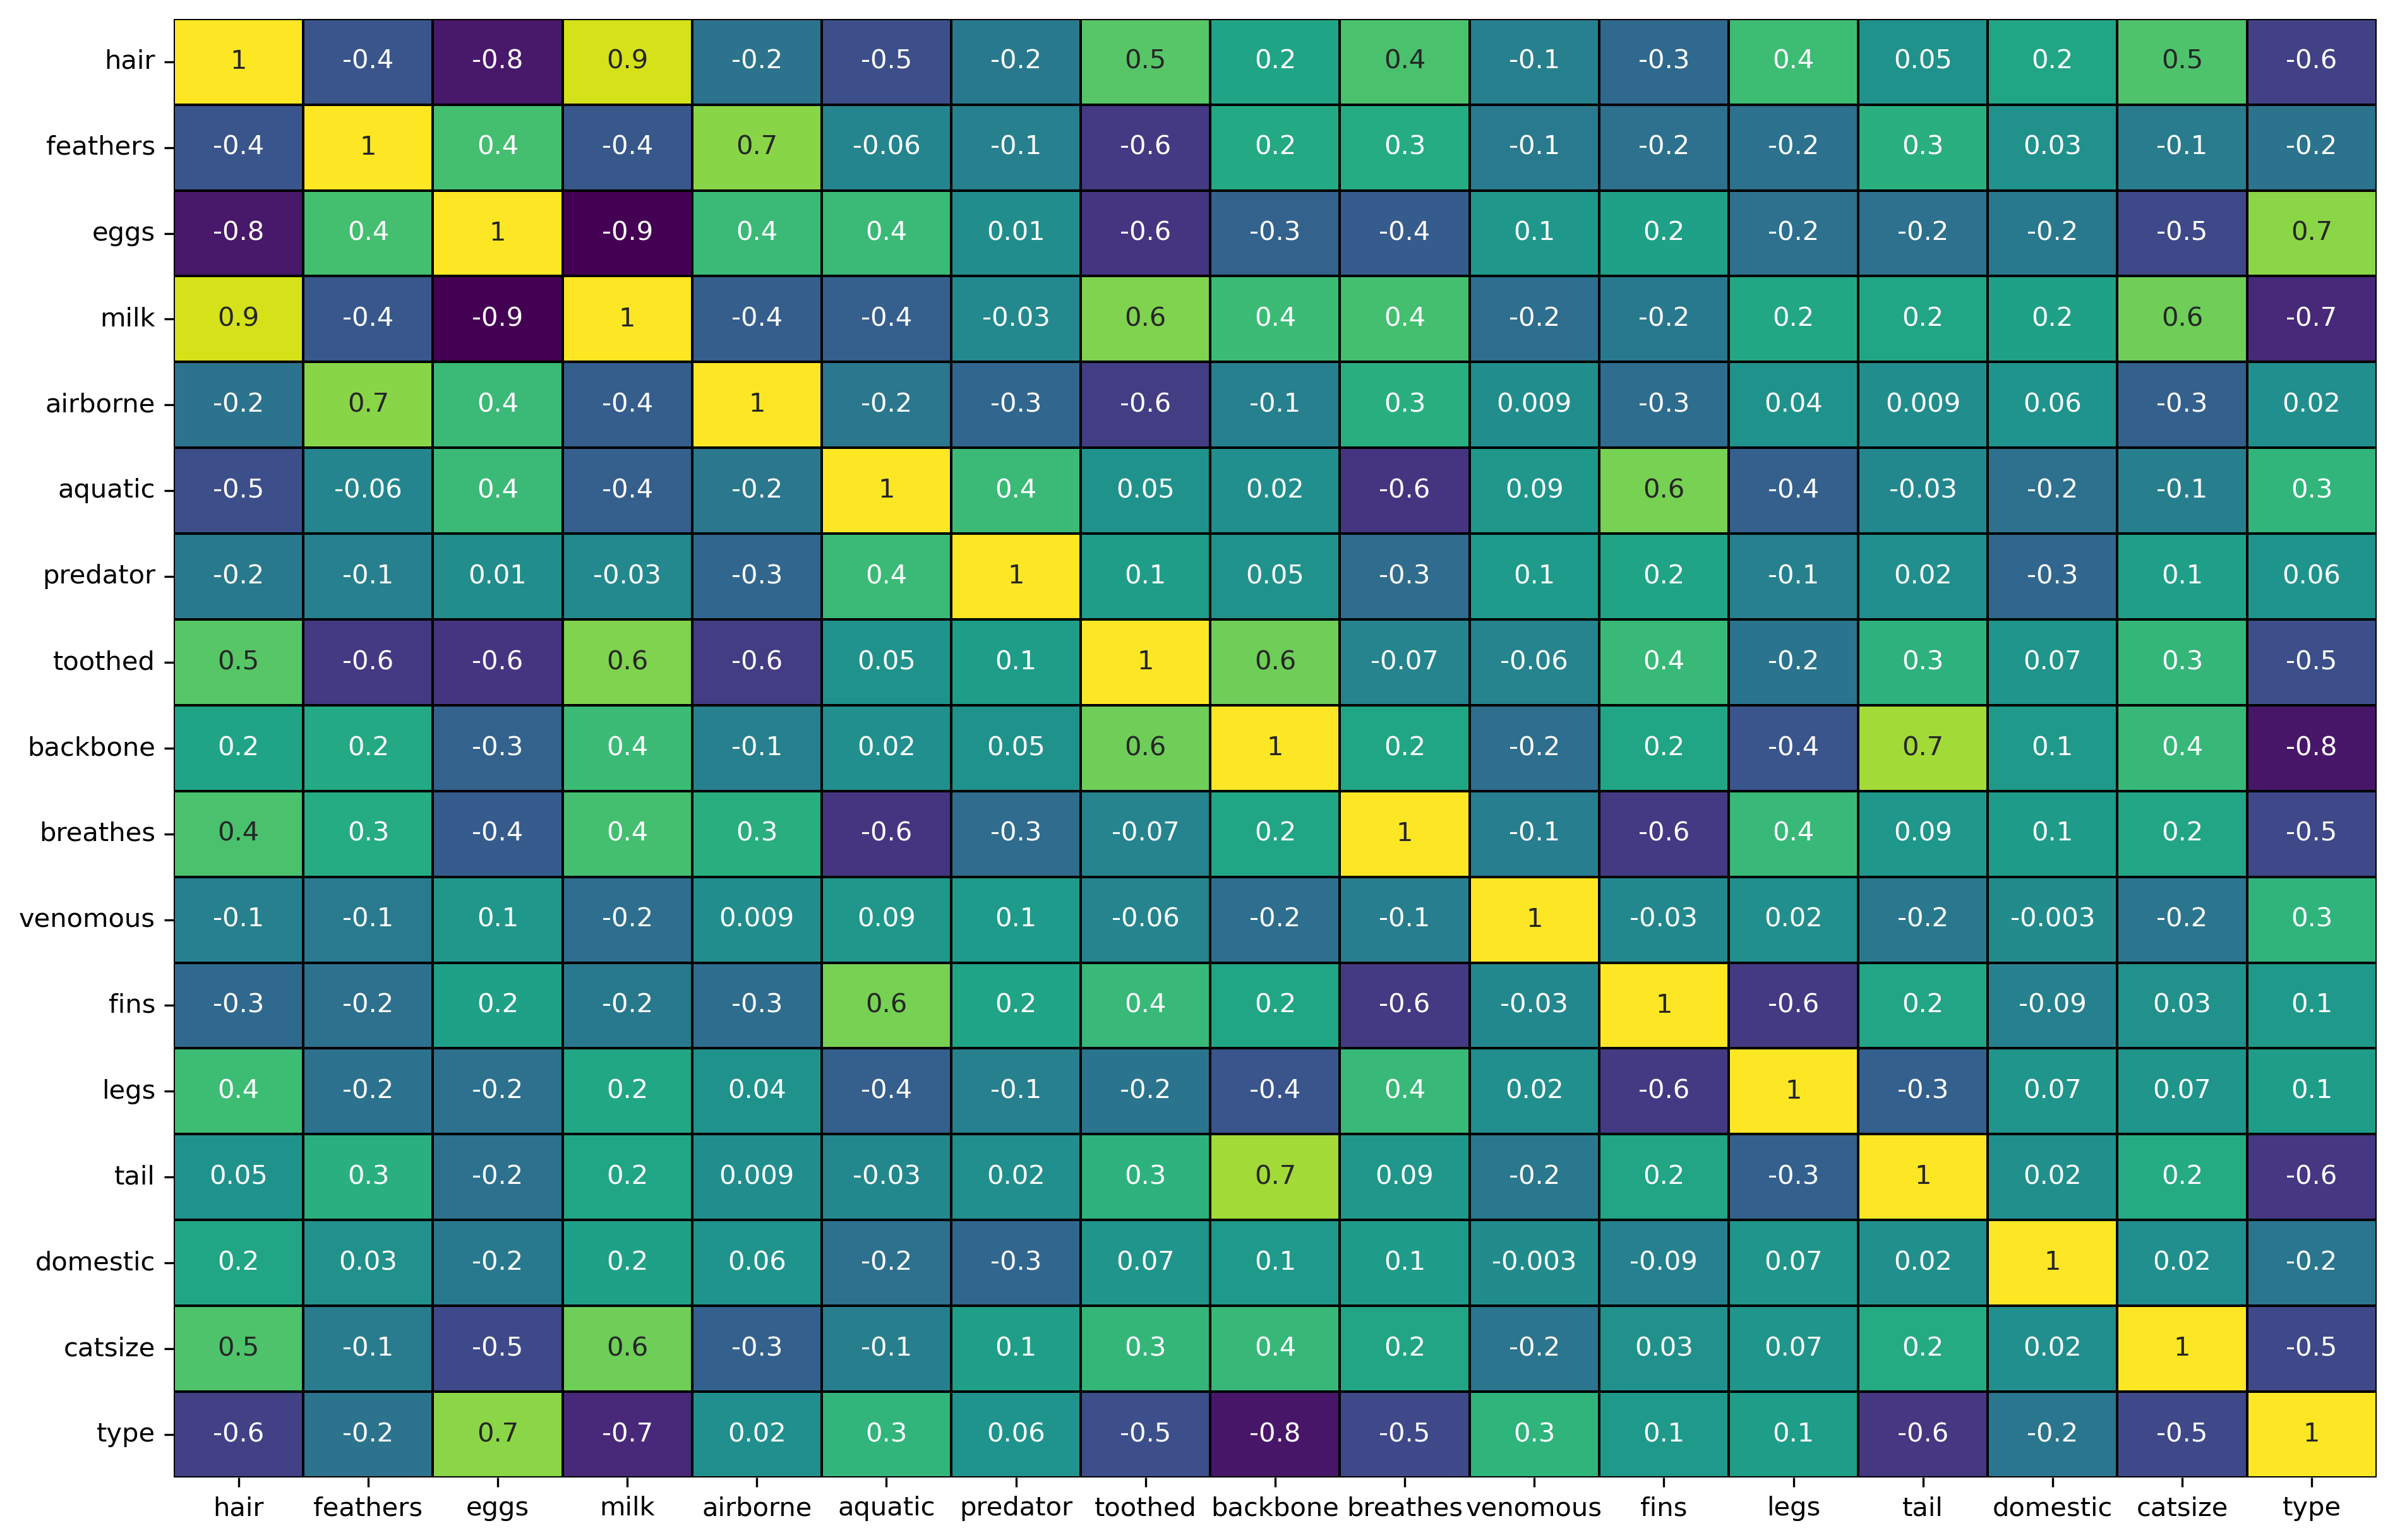

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [12]:
NumberofPlayers = df.groupby(pd.Grouper(key='type')).size().reset_index(name='count')
fig = px.treemap(NumberofPlayers, path=['type'], values='count')
fig.update_layout(title_text='Animal Class Types Distribution Tree',
                  title_x=0.5, title_font=dict(size=25))
fig.update_traces(textinfo="label+value")

fig.show()

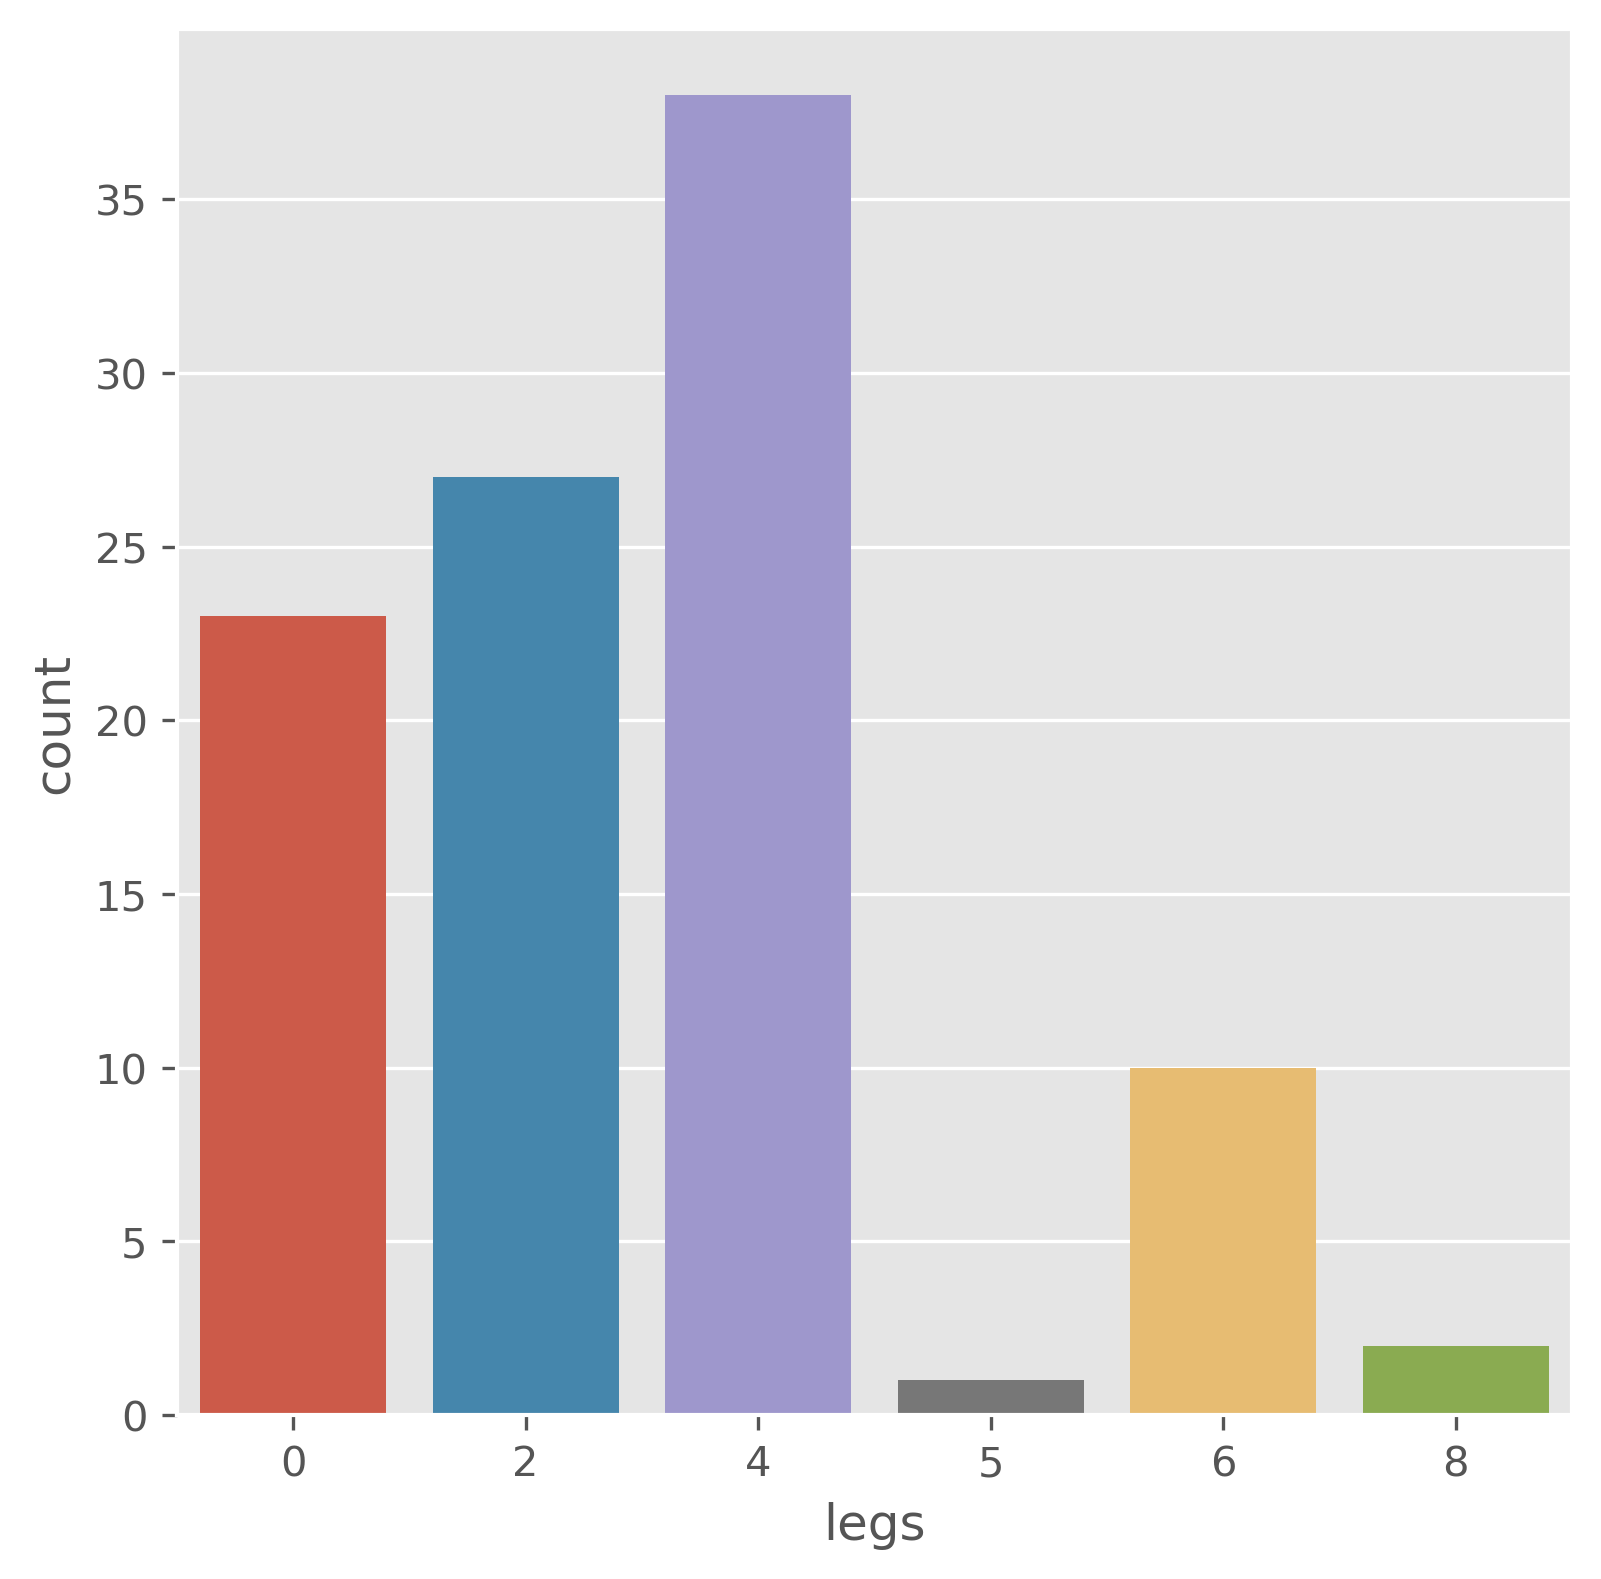

In [13]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data = df , x = 'legs');

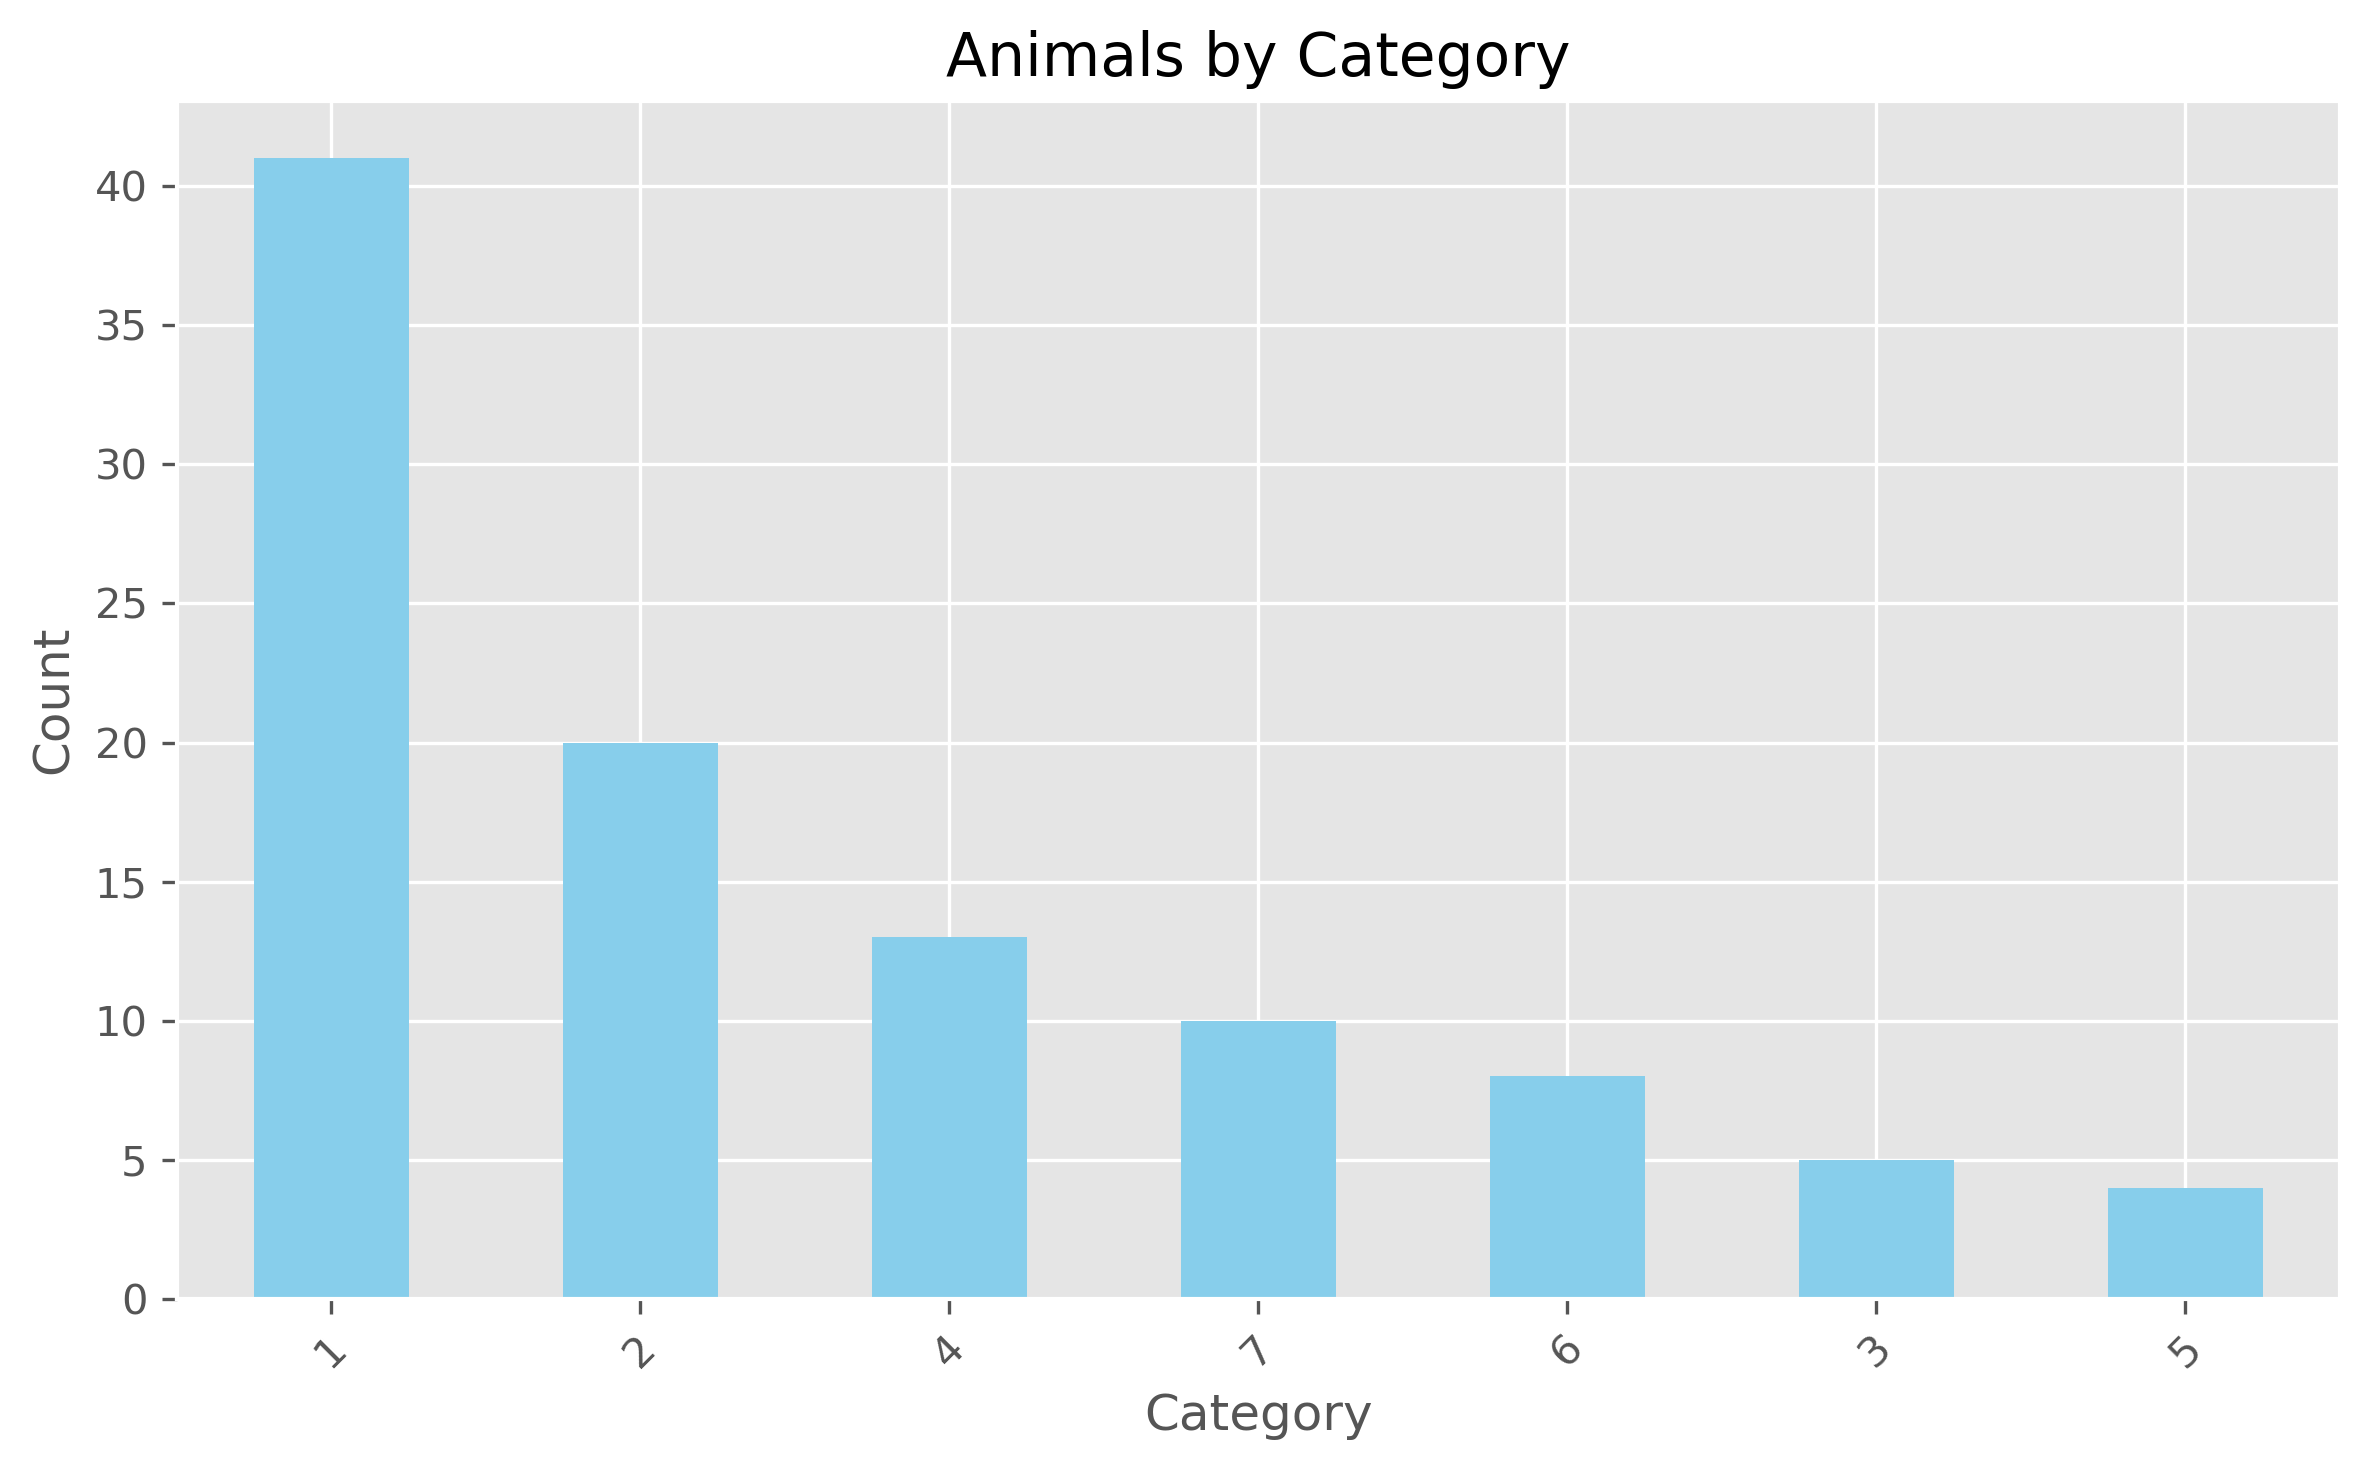

In [14]:
category_counts = df['type'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Animals by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

In [15]:
df.drop('animal name', axis = 1,inplace=True)

In [16]:
# splitting into features & target
x = df.drop('type', axis = 1)
y = df['type']

In [17]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [18]:
# standardizing the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x = sc.fit_transform(x)

In [19]:
base_model = KNeighborsClassifier()
base_model.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
base_pred = base_model.predict(x_test)

In [21]:
confusion_matrix(y_test,base_pred)

array([[6, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 2]], dtype=int64)

In [22]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.67      0.80         3

    accuracy                           0.90        21
   macro avg       0.77      0.81      0.77        21
weighted avg       0.89      0.90      0.89        21



In [23]:
error_rate= []

for k in range (1,25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_kpred = model.predict(x_test)
    test_error = 1 - accuracy_score(y_test,y_kpred)
    error_rate.append(test_error)

Text(0.5, 0, 'K Value')

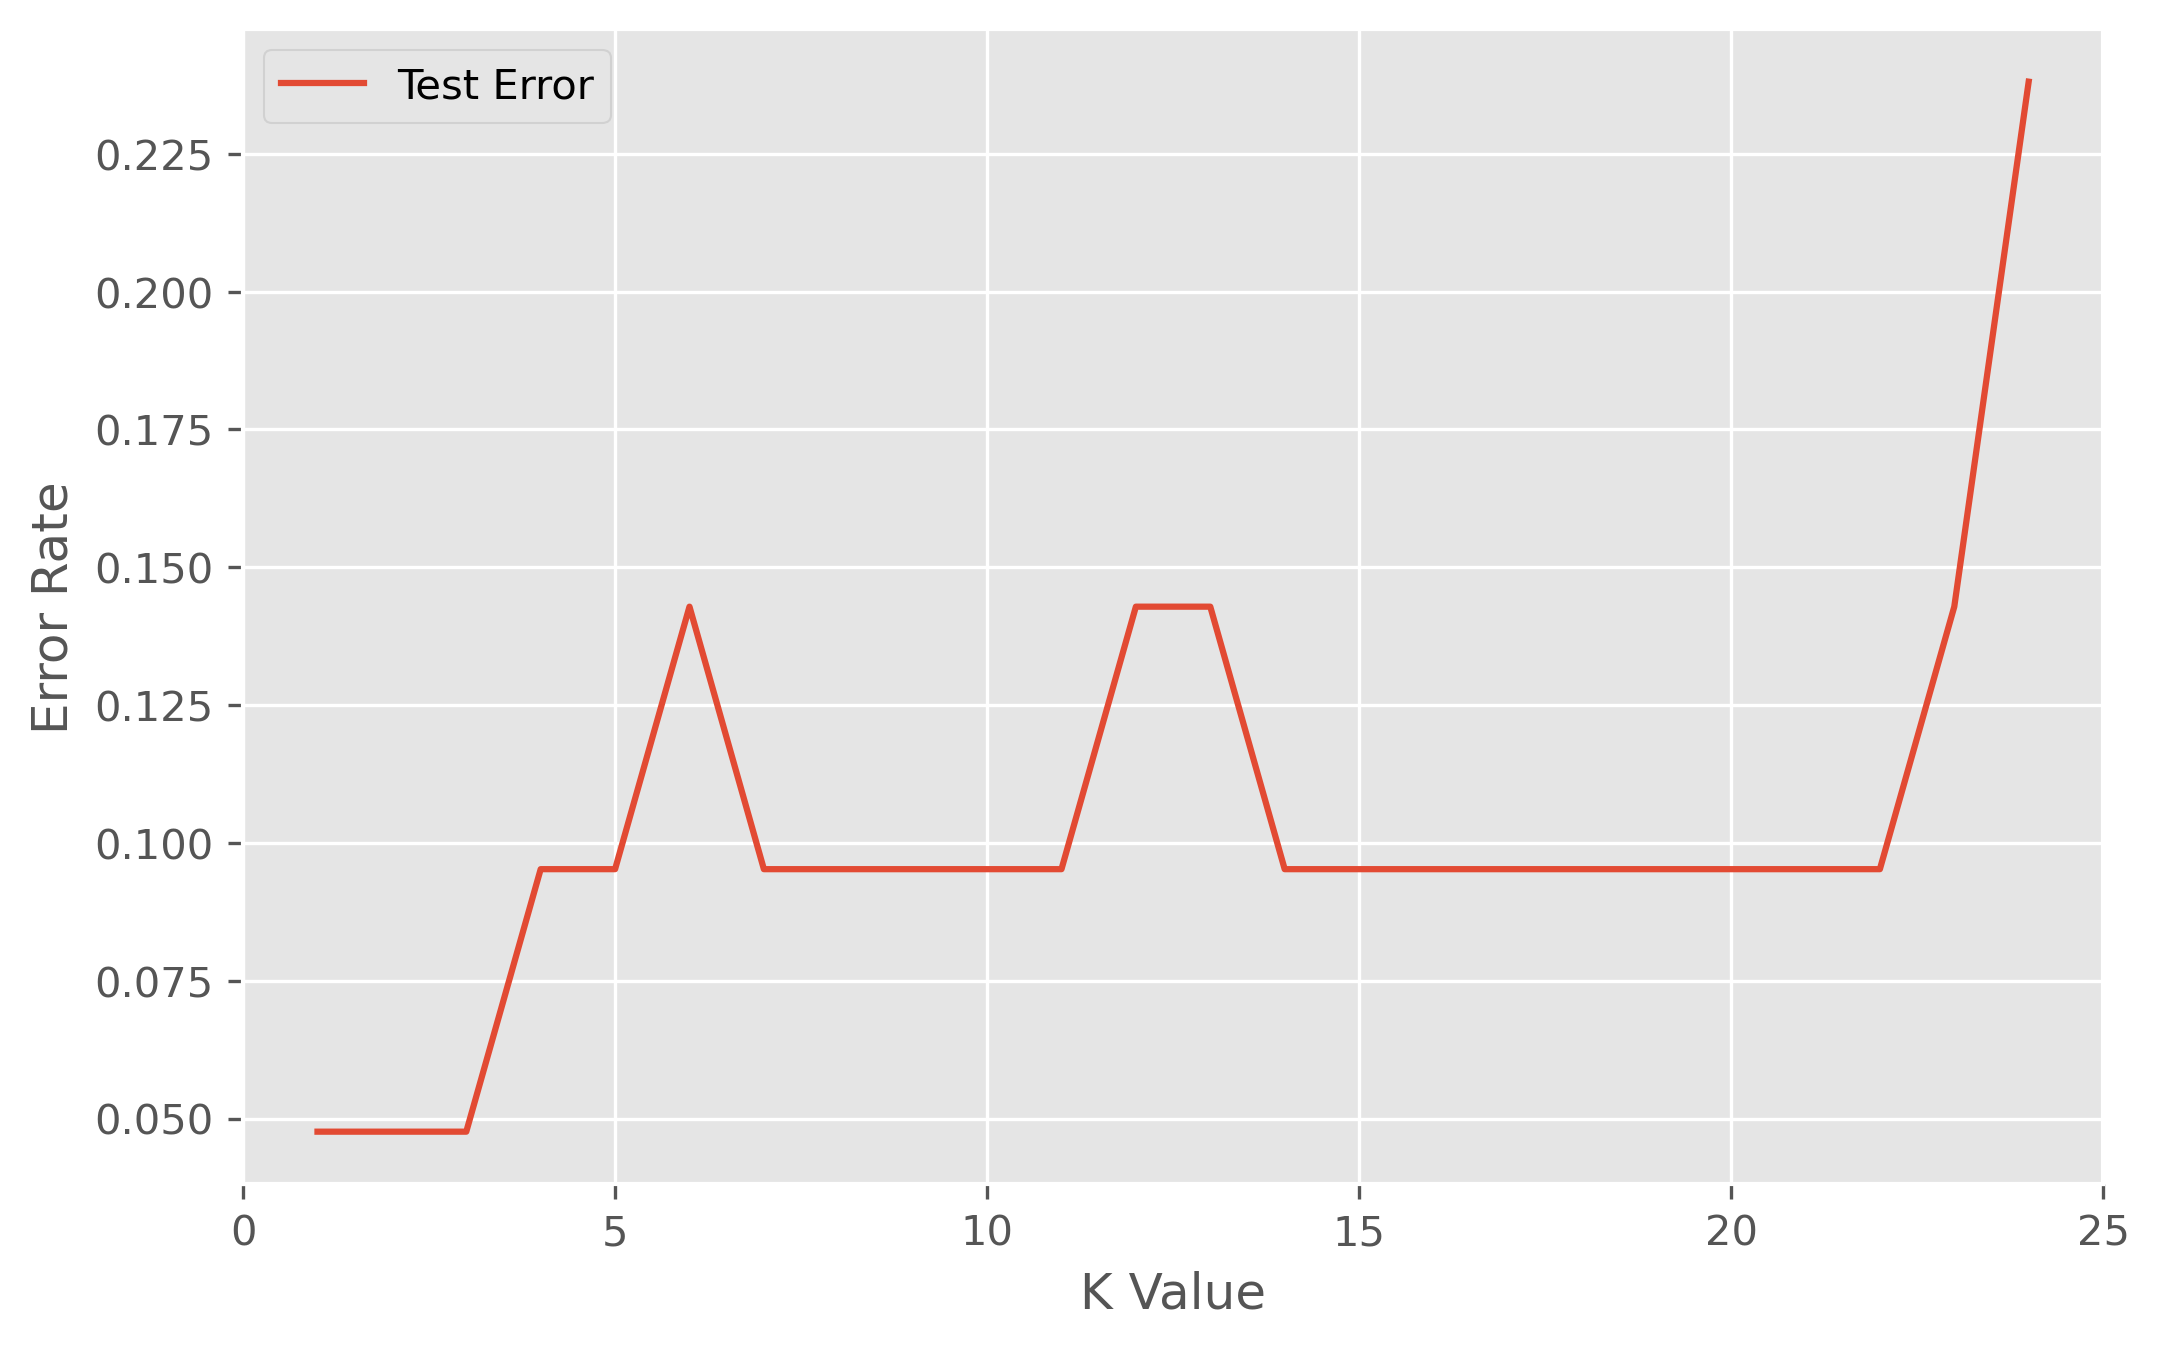

In [24]:
plt.plot(range(1,25),error_rate,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlim(0,25,1)
plt.xlabel("K Value")

In [25]:
#  getting all the parameters with their default values

KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [26]:
# creating a parameter Grid

param_grid = {"n_neighbors":range(1,25),"metric":['minkowski','euclidean']}

In [27]:
knn = KNeighborsClassifier()

In [28]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [29]:
# initilizing the gridsearch cv model

grid_model = GridSearchCV(estimator=knn,param_grid=param_grid, cv = 10)

#training the gridserch model on train data

grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 25)})

In [30]:
# checking for best performing estimators

print(grid_model.best_estimator_)

# checking for best performing parameters

print(grid_model.best_params_)

KNeighborsClassifier(n_neighbors=1)
{'metric': 'minkowski', 'n_neighbors': 1}


In [31]:
# getting best score

grid_model.best_score_

0.9625

In [32]:
# predicting using best performing parameters

pred = grid_model.predict(x_test)

In [33]:
confusion_matrix(y_test, pred)

array([[6, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 3]], dtype=int64)

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.84      0.86      0.85        21
weighted avg       0.91      0.95      0.93        21



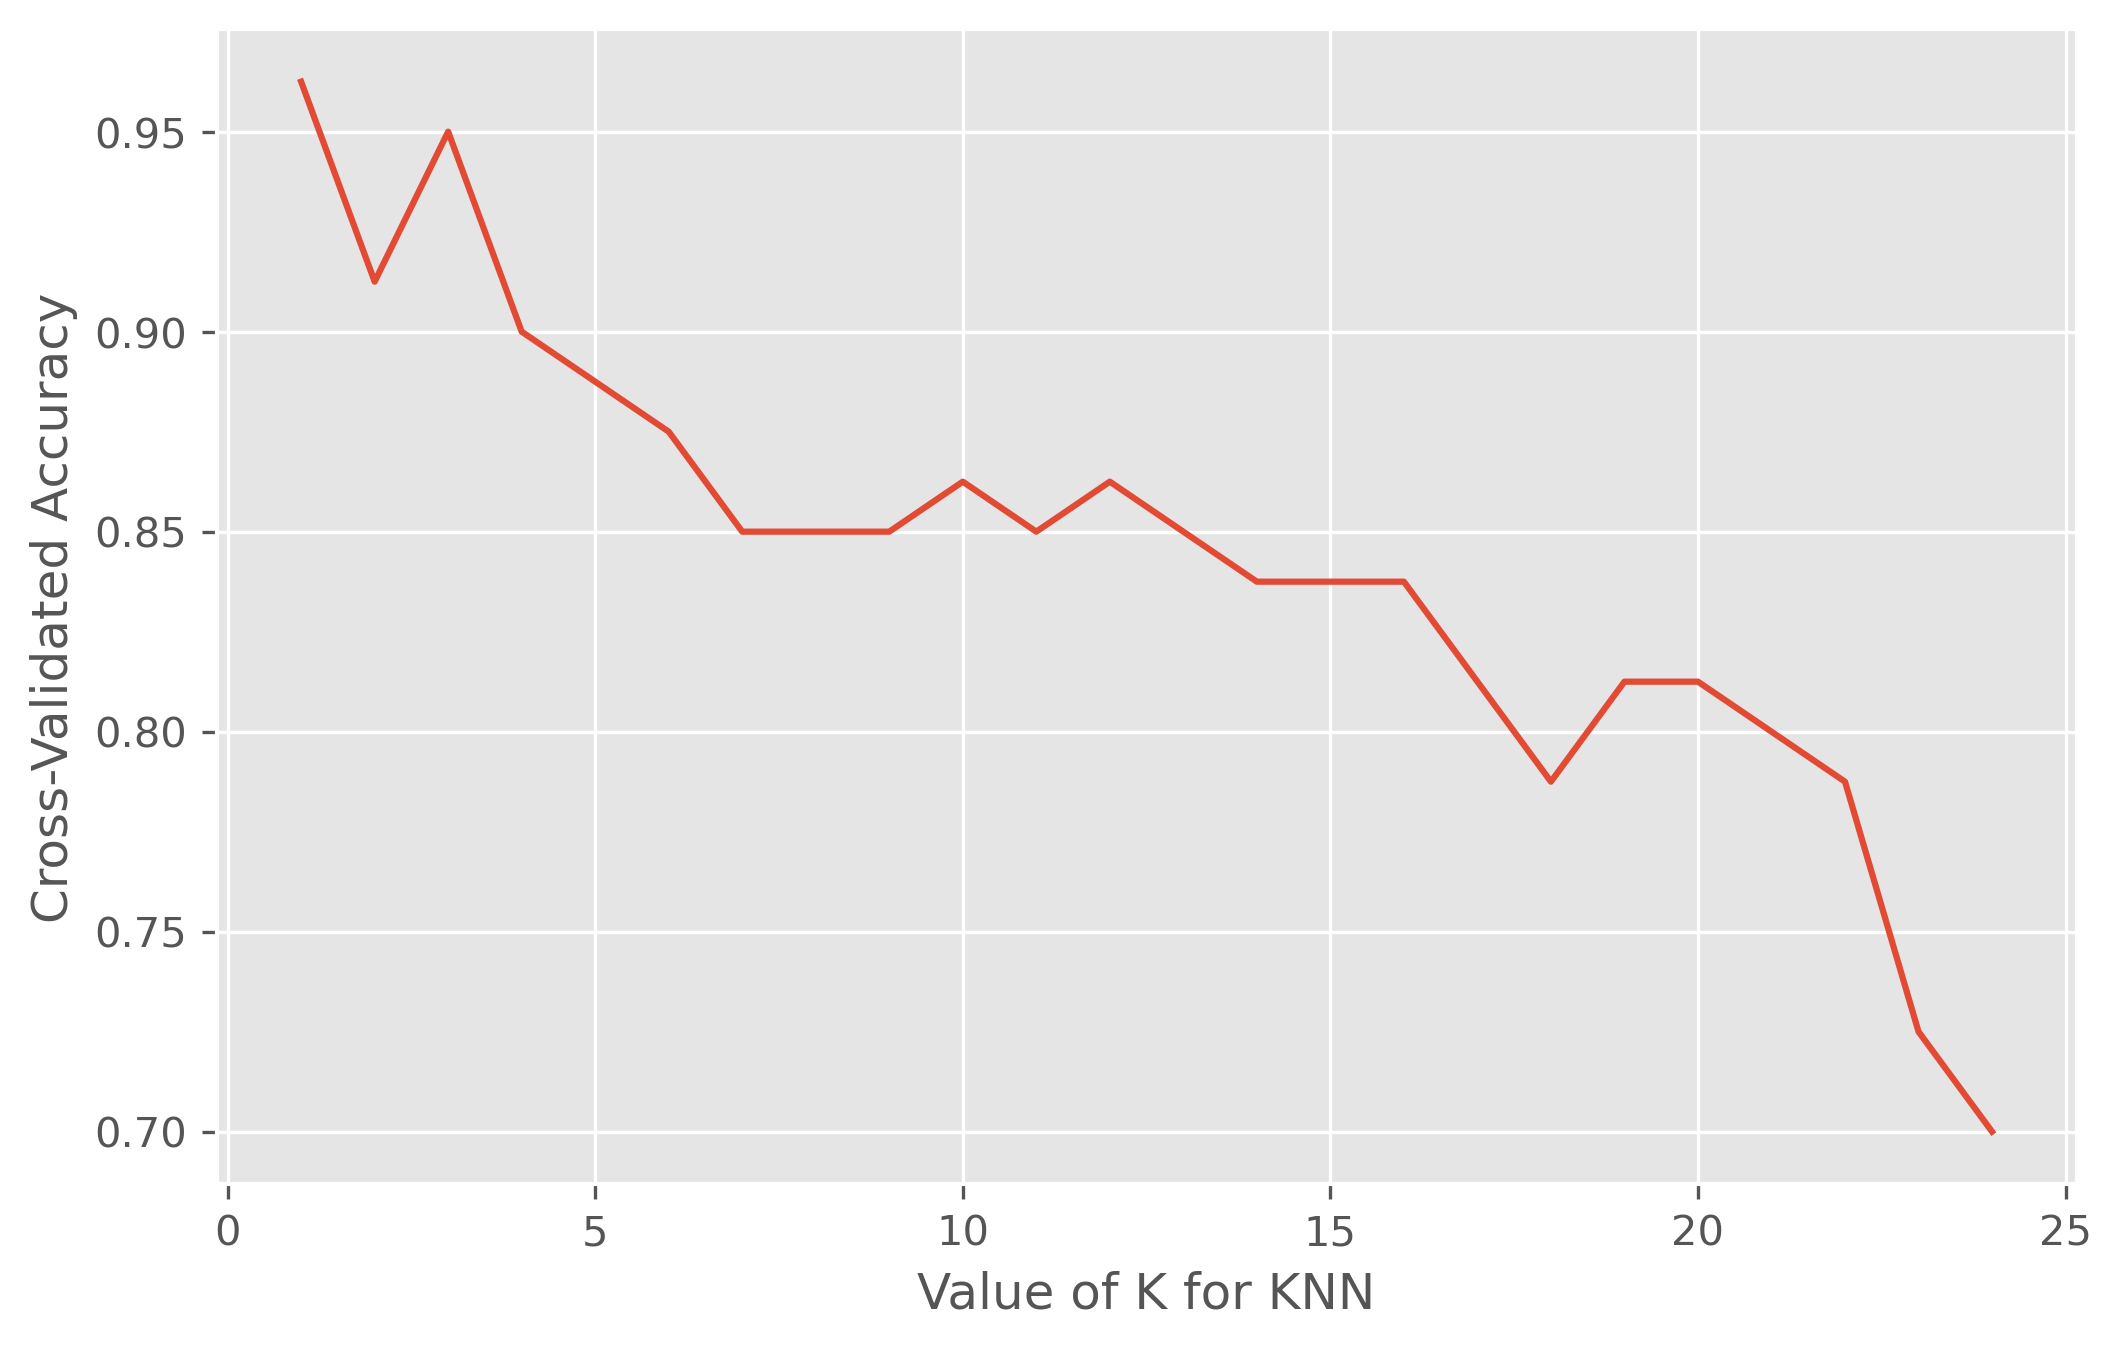

In [35]:
# choose k between 1 to 25

k_range = range(1, 25)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
# final model using k-vlaue = 2

final_model = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 2)
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
print(confusion_matrix(y_test,final_pred))
print(classification_report(y_test,final_pred))

[[6 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.84      0.86      0.85        21
weighted avg       0.91      0.95      0.93        21



In [37]:
# training on complete dataset using k-vlaue = 2

final_model = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 2)
final_model.fit(x,y)
final_pred = final_model.predict(x)
print(confusion_matrix(y,final_pred))
print(classification_report(y,final_pred))

[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  1  4  0  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  2  0  2  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.95      1.00      0.98        20
           3       0.67      0.80      0.73         5
           4       1.00      1.00      1.00        13
           5       1.00      0.50      0.67         4
           6       0.89      1.00      0.94         8
           7       1.00      0.90      0.95        10

    accuracy                           0.96       101
   macro avg       0.93      0.89      0.89       101
weighted avg       0.97      0.96      0.96       101

